In [1]:
'''
A Reccurent Neural Network (LSTM) implementation example using TensorFlow library.
This example is using the MNIST database of handwritten digits (http://yann.lecun.com/exdb/mnist/)
Long Short Term Memory paper: http://deeplearning.cs.cmu.edu/pdfs/Hochreiter97_lstm.pdf

Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''

'\nA Reccurent Neural Network (LSTM) implementation example using TensorFlow library.\nThis example is using the MNIST database of handwritten digits (http://yann.lecun.com/exdb/mnist/)\nLong Short Term Memory paper: http://deeplearning.cs.cmu.edu/pdfs/Hochreiter97_lstm.pdf\n\nAuthor: Aymeric Damien\nProject: https://github.com/aymericdamien/TensorFlow-Examples/\n'

In [2]:
import tensorflow as tf
from tensorflow.python.ops import rnn, rnn_cell
import numpy as np

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
'''
To classify images using a reccurent neural network, we consider every image
row as a sequence of pixels. Because MNIST image shape is 28*28px, we will then
handle 28 sequences of 28 steps for every sample.
'''

'\nTo classify images using a reccurent neural network, we consider every image\nrow as a sequence of pixels. Because MNIST image shape is 28*28px, we will then\nhandle 28 sequences of 28 steps for every sample.\n'

In [4]:
# Parameters
learning_rate = 0.001
training_iters = 100000
batch_size = 128
display_step = 10

# Network Parameters
n_input = 28 # MNIST data input (img shape: 28*28)
n_steps = 28 # timesteps
n_hidden = 128 # hidden layer num of features
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder("float", [None, n_steps, n_input])
y = tf.placeholder("float", [None, n_classes])

# Define weights
weights = {
    'out': tf.Variable(tf.random_normal([n_hidden, n_classes]))
}
biases = {
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [5]:
def RNN(x, weights, biases):

    # Prepare data shape to match `rnn` function requirements
    # Current data input shape: (batch_size, n_steps, n_input)
    # Required shape: 'n_steps' tensors list of shape (batch_size, n_input)
    
    # Permuting batch_size and n_steps
    x = tf.transpose(x, [1, 0, 2])
    # Reshaping to (n_steps*batch_size, n_input)
    x = tf.reshape(x, [-1, n_input])
    # Split to get a list of 'n_steps' tensors of shape (batch_size, n_input)
    x = tf.split(0, n_steps, x)

    # Define a lstm cell with tensorflow
    lstm_cell = rnn_cell.BasicLSTMCell(n_hidden, forget_bias=1.0)

    # Get lstm cell output
    outputs, states = rnn.rnn(lstm_cell, x, dtype=tf.float32)

    # Linear activation, using rnn inner loop last output
    return tf.matmul(outputs[-1], weights['out']) + biases['out']

pred = RNN(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.initialize_all_variables()

In [6]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    step = 1
    # Keep training until reach max iterations
    while step * batch_size < training_iters:
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Reshape data to get 28 seq of 28 elements
        batch_x = batch_x.reshape((batch_size, n_steps, n_input))
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        if step % display_step == 0:
            # Calculate batch accuracy
            acc = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y})
            # Calculate batch loss
            loss = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
            print "Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc)
        step += 1
    print "Optimization Finished!"

    # Calculate accuracy for 128 mnist test images
    test_len = 128
    test_data = mnist.test.images[:test_len].reshape((-1, n_steps, n_input))
    test_label = mnist.test.labels[:test_len]
    print "Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: test_data, y: test_label})

Iter 1280, Minibatch Loss= 1.802201, Training Accuracy= 0.38281
Iter 2560, Minibatch Loss= 1.488374, Training Accuracy= 0.53906
Iter 3840, Minibatch Loss= 1.198038, Training Accuracy= 0.58594
Iter 5120, Minibatch Loss= 0.834570, Training Accuracy= 0.72656
Iter 6400, Minibatch Loss= 0.654914, Training Accuracy= 0.78125
Iter 7680, Minibatch Loss= 1.033477, Training Accuracy= 0.71094
Iter 8960, Minibatch Loss= 0.651782, Training Accuracy= 0.79688
Iter 10240, Minibatch Loss= 0.515484, Training Accuracy= 0.81250
Iter 11520, Minibatch Loss= 0.323801, Training Accuracy= 0.92188
Iter 12800, Minibatch Loss= 0.560313, Training Accuracy= 0.84375
Iter 14080, Minibatch Loss= 0.385839, Training Accuracy= 0.88281
Iter 15360, Minibatch Loss= 0.333695, Training Accuracy= 0.88281
Iter 16640, Minibatch Loss= 0.389197, Training Accuracy= 0.90625
Iter 17920, Minibatch Loss= 0.272849, Training Accuracy= 0.92188
Iter 19200, Minibatch Loss= 0.251369, Training Accuracy= 0.88281
Iter 20480, Minibatch Loss= 0.16

In [7]:
test_data = mnist.test.images[:1].reshape((-1, n_steps, n_input))
print test_data
test_label = mnist.test.labels[:1]
print test_label


[[[ 0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.          0.        ]
  [ 0.          0.       

(1, 28, 28)
7


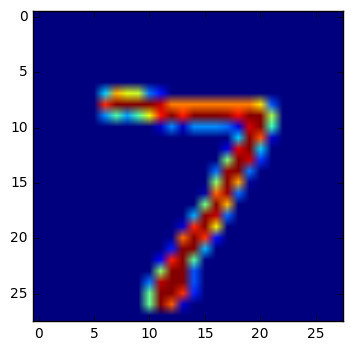

In [11]:
print test_data.shape
%matplotlib inline
import matplotlib.pyplot as plt
first_array=test_data[0]
#Not sure you even have to do that if you just want to visualize it
#first_array=255*first_array
#first_array=first_array.astype("uint8")
plt.imshow(first_array)
print np.argmax(test_label)